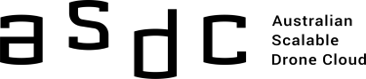

## <center>Structural Geology Use Case</center>


Fracture detection with Complex Shearlet Transform based on 
https://github.com/rahulprabhakaran/Automatic-Fracture-Detection-Code

Using the Python port of the Matlab Toolbox Complex Shearlet-Based Ridge and Edge Measurement by Rafael Reisenhofer: 

https://github.com/rgcda/PyCoShREM

In [1]:
import sys
import os
sys.path.append('py_modules')
from processing import *
from tools import *

## Select Image and load it
For some images it is necessary to apply histogram equalisation in order to enhance the contrast. 

Edge detection applications migth require to apply Gaussian blur (we use a 5x5 Kernel as default).

In [2]:
Tools.SelectFile(Tools)
Tools.SelectEnhancement(Tools)

Dropdown(description='Imagetype:', options=('rgb', 'dem', 'mag'), value='rgb')

image size:  (859, 860)
selected 1  images


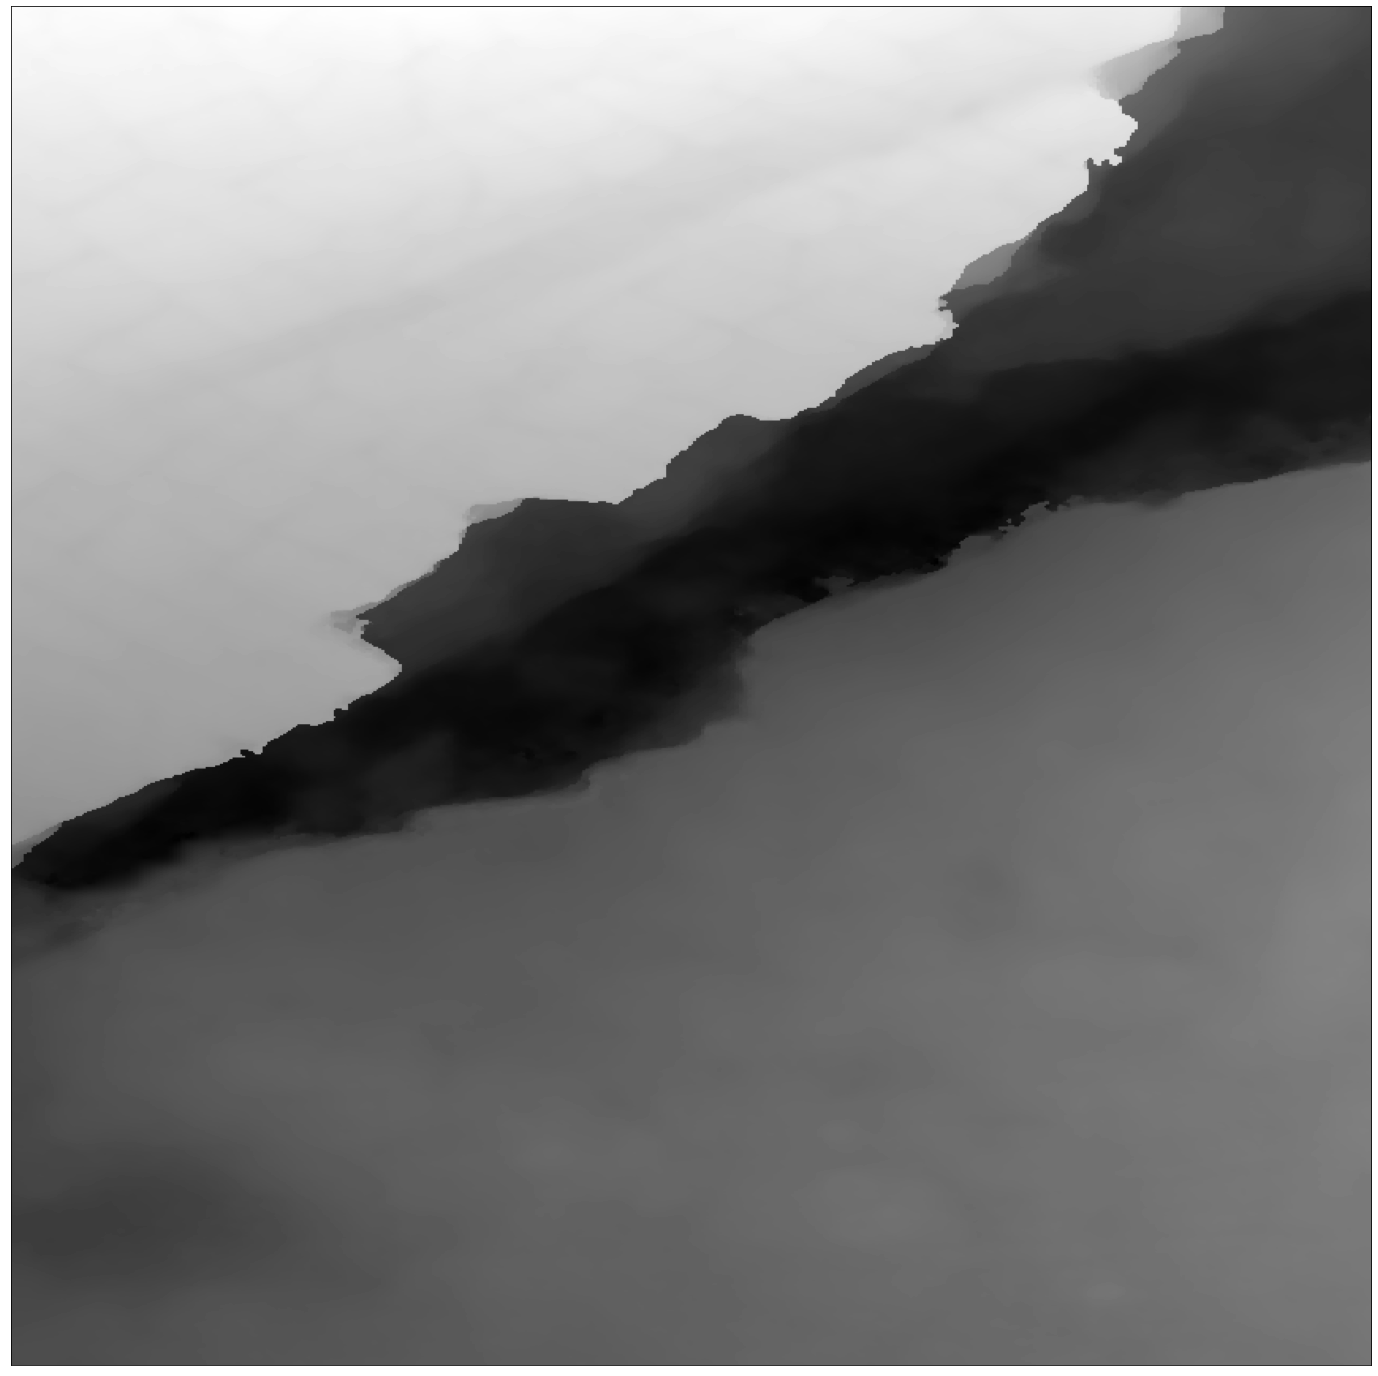

In [4]:
img_list = ReadImage(Tools.FILE, Tools.HISTEQ, Tools.GAUSBL)
Tools.ShowImage(img_list)   
i_size = ImgSizes(img_list)

# Select System Parameters
### waveletEffSupp

Length of the effective support in pixels of the Mexican hat wavelet ψ used in the construction the generating shearlet ψgen(x, y) = ψ(x)φ(y), where φ is a Gaussian. The effective support is the interval on which the values of ψ significantly differ from 0. It is, however, not a strictly defined property. A good choice for this parameter is often 1/8 of the image width. If the edges/ridges in the processed image are visible on a large scale, this value should be large relative to the width and height of the processed image.

### gaussianEffSupp
Length of the effective support in pixels of the Gaussian φ used in the construction of the generating shearlet ψgen(x, y) = ψ(x)φ(y), where ψ is a Mexican hat wavelet. Typically, this value is chosen to be roughly the half of waveletEffSupp. However, if the edges/ridges in the processed image consist of smooth curves, it can be chosen larger.

### scalesPerOctave
Determines the number of intermediate scales for each octave. If scalesPerOctave is set to n, for each orientation, there will be n differently scaled shearlets within one octave.

### shearLevel (orientations)
Determines the number of differently oriented shearlets on each scale. If shearLevel is set to n, there will be 2n + 2 differently sheared shearlets on each scale, completing a 180◦ semi-circle.

### alpha (orientations)
This parameter can take any value between 0 and 1 and governs the degree of anisotropy introduced via scaling. Roughly speaking, it determines how much the Gaussian is squeezed relative to the wavelet, when scaling the generating shearlet. Formally, the n-th octave is defined by ψn(x, y) = ψgen(2nx, 2αny). For alpha = 0, the degree of anisotropy is maximized while for alpha = 1, both directions are treated the same.

### octaves
The number of octaves spanned by the shearlet system. When scales- PerOctave is greater than 1, this parameter can also take non-integer values.

In [ ]:
Tools.SystemCombinations(Tools)

In [ ]:
systems = GenerateSystems(i_size, 
                          SplitInput(Tools.WAVEEF, False),
                          SplitInput(Tools.GAUSEF, False),
                          SplitInput(Tools.SCALES, True),
                          SplitInput(Tools.SHEARL, True),
                          SplitInput(Tools.ALPHA, False),
                          SplitInput(Tools.OCTAVE, False),
                          Tools.RIDGES)                        

# Detection Parameters

### minContrast
Specifies the minimal contrast for an edge/ridge to be detected.

### offset
This parameter defines a scaling offset between the even- and odd- symmetric shearlets measured in octaves. If offset = x, the first even-symmetric shearlet used for the computation of the complex shearlet-based edge measure is already x octaves above the first odd- symmetric shearlet considered. In the case of the ridge measure, the converse is true.

### scalesUsedForPivotSearch
This parameter defines which scales of the shearlet system are considered for determining the orientation for which the complex shearlet-based edge/ridge measure is computed at a specific loca- tion. It can take the values ’all’, ’highest’, ’lowest’ and any subset B ⊂ {1, . . . , scalesPerOctave·octaves}.

In [ ]:
Tools.DetectionCombinations(Tools, Tools.RIDGES)

In [ ]:
features = DetectFeatures(img_list, 
                          i_size,
                          systems, 
                          SplitInput(Tools.MINCON, False),
                          SplitInput(Tools.OFFSET, False),
                          Tools.PIVOTS, 
                          Tools.NEGATI, 
                          Tools.POSITV, 
                          Tools.RIDGES)

In [ ]:
Tools.ShowOverlay(img_list, features)

# Clean feature ensemble

### min pixel value
The minimum pixel value in teh normalized feature ensemble. Pixel below this threshold will be exluded.

### kernel size
The size of the kernel used for morhological closing (Dilation followed by Erosion). 

### contrast
The contrast enahncemnt perfomed on teh feature image.

### connectivity
Minimum connectivity of pixel clusters.

### min cluster size
The minimum size of pixel cluster to keep in teh image. Clusters below this threshold will be excluded.

In [ ]:
Tools.Enhancement(Tools)

In [ ]:
enh_img_list = EnhanceEnsemble(features,  
                            Tools.THRESH, 
                            Tools.KSIZE, 
                            Tools.CONTRA,
                            Tools.CONNE,
                            Tools.MINSI)
Tools.ShowCompare(features, enh_img_list)